<h1><center>Laboratorio 7: Interpretabilidad 🤖</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos - Primavera 2025</strong></center>

### Cuerpo Docente:

- Profesores: Diego Cortez, Gabriel Iturra
- Auxiliares: Melanie Peña, Valentina Rojas
- Ayudantes: Nicolás Cabello, Cristopher Urbina

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Santiago Haberle
- Nombre de alumno 2: Francisco Márquez


### **Link de repositorio de GitHub:** [Insertar Repositorio](https://github.com/fco-marquez/MDS7202_Free_Riders)

### Indice

1. [Temas a tratar](#Temas-a-tratar:)
3. [Descripcción del laboratorio](#Descripción-del-laboratorio.)
4. [Desarrollo](#Desarrollo)

## Temas a tratar

- Clasificación usando `XGBoost`.
- Métodos Agnósticos Globales de Interpretabilidad (`Partial Dependence Plot`, `Permutation Feature Importance`)
- Métodos Agnósticos Locales de Interpretabilidad (`Scoped Rules`, `SHAP`)

## Reglas:

- **Grupos de 2 personas**
- Fecha de entrega: Entregas Martes a las 23:59.
- Instrucciones del lab el viernes a las 16:15 en formato online. Asistencia no es obligatoria, pero se recomienda **fuertemente** asistir.
- <u>Prohibidas las copias</u>. Cualquier intento de copia será debidamente penalizado con el reglamento de la escuela.
- Tienen que subir el laboratorio a u-cursos y a su repositorio de github. Labs que no estén en u-cursos no serán revisados. Recuerden que el repositorio también tiene nota.
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Pueden usar cualquier material del curso que estimen conveniente.


### Objetivos principales del laboratorio

- Generar un pipeline de clasificación con `XGBoost`.
- Implementar modelos de interpretabilidad para explicar el funcionamiento del modelo de clasificación.

El laboratorio deberá ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al máximo las funciones optimizadas que nos entrega `pandas`, las cuales vale mencionar, son bastante más eficientes que los iteradores nativos sobre DataFrames.

# 1. Problemas Clínicos del Dr. Simi

<p align="center">
  <img src="https://gantz.cl/wp-content/uploads/2020/01/79024136_2718114448239059_7240913062570491904_o.jpg" width="350">
</p>

El reconocido **Dr. Simi**, famoso vendedor de medicamentos en latinoamerica, debido a la creciente prevalencia de enfermedades crónicas, como la diabetes, decidió abrir una clínica especializada en el tratamiento de esta enfermedad en nuestro país.

La clínica del Doctor Simi se convirtió en un lugar donde los pacientes con diabetes podrían recibir atención médica integral. El personal médico estaba compuesto por especialistas en endocrinología, nutrición y enfermería, todos capacitados en el manejo de la diabetes.

Sin embargo él se ha dado cuenta que los tiempos han cambiado y gracias a las tecnologías es posible generar mejores predicciones en la diabetes conociendo el historial médico de las personas. Por esto, el doctor se ha colocado una meta de incluir modelos de machine learning dentro de sus clínicas, para ello le ha solicitado crear un modelo capaz de predecir/clasificar diabetes pero le rogó que el desarrollo del modelo tuviera un especial enfoque en la interpretabilidad de lo que hace su modelo.

Para que usted pueda entrenar el modelo, Dr. Simi le ha entregado un dataset de todos los clientes que fueron detectados con diabetes a lo largo de la historia de la clinica. Con ello, adjunta el historial médico de las personas en forma de datos tabulares para que usted pueda realizar fácilmente la clasificación.


In [2]:
import numpy as np
import pandas as pd

df = pd.read_csv('diabetes_data.csv')
df.head(5)

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


## 2. Clasificación de pacientes con diabetes (5 puntos)

<p align="center">
  <img src="https://media.tenor.com/QH--g3ZaSbsAAAAC/dr-simi-abrazo.gif" width="400">
</p>

Tareas:
1. En primer lugar, el reconocido doctor le pide entrenar un modelo de `XGBoost` utilizando como target la columna `Diabetes` del dataset `diabetes_data.csv`. Para el entrenamiento, realice los siguientes pasos:
  * Realice una breve exploración de los datos y determine si aplicará transformaciones (MinMaxScaler, StandardScaler, etc.) en alguna/s de las variables. (1 punto)
  * Cree un conjunto de entrenamiento y uno de prueba, con una proporción de 1/3 en el conjunto de prueba. (0.5 puntos)
  * Cree un ColumnTransformer de preprocesamiento donde aplique las transformaciones determinadas anteriormente. Fije el parámetro `verbose_feature_names_out=False` y fije la salida del ColumnTransformer en formato pandas mediante el método `.set_output(transform='pandas')`. (1 punto)
  *  Cree un pipeline donde integre el preprocesamiento y el modelo `XGBoost` y entrene el modelo. Luego utilice `classification_report(..)` para reportar el desempeño del modelo. (1 punto)

Comente sus decisiones y los resultados obtenidos con el modelo.

2. Luego, le pide responder las siguientes preguntas:
  *  ¿Es acaso un buen predictor de diabetes? (0.5 puntos)
  * ¿Qué buscan explicar las métricas utilizadas? (0.5 puntos)
  * ¿Las métricas utilizadas para medir la predictibilidad le permiten asegurar que su modelo haga una buena elección de las features?(0.5 puntos)

In [3]:
!pip install xgboost


[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: C:\Users\shabe\AppData\Local\Programs\Python\Python312\python.exe -m pip install --upgrade pip


In [4]:
# Inserte su código aquí

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from xgboost import XGBClassifier


### 2.1

In [5]:
X = df.drop(columns="Diabetes")
y = df["Diabetes"]

print("\nValores nulos:\n", X.isna().sum())
X.describe()


Valores nulos:
 Age                     0
Sex                     0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Stroke                  0
HighBP                  0
dtype: int64


,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,8.584055,0.456997,0.525703,0.975259,29.856985,0.475273,0.147810,0.703036,0.611795,0.788774,0.042721,2.837082,3.752037,5.810417,0.252730,0.062171,0.563458
std,2.852153,0.498151,0.499342,0.155336,7.113954,0.499392,0.354914,0.456924,0.487345,0.408181,0.202228,1.113565,8.155627,10.062261,0.434581,0.241468,0.495960
min,1.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9.000000,0.000000,1.000000,1.000000,29.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,11.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,0.000000,1.000000
max,13.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,1.000000


In [6]:
X["HvyAlcoholConsump"].value_counts()

HvyAlcoholConsump
0.0    67672
1.0     3020
Name: count, dtype: int64

En base a esta breve exploración inicial, es claro que la gran mayoría de los atributos corresponden a variables binarias, por ende no es necesario aplicar un escalamiento sobre estas. Para las que no lo son, identificamos 2 tipos, las numericas continuas (Age y BMI) y las que tienen una cierta jerarquía entre ellas, siendo variables ordinales (MentHlth, PhysHlth, GenHllth). Para estas aplicamos un standar scaler para las continuas para evitar problemas de dimensiones, y un MinMaxScaler para las ordinales y así mantener el orden jerarquico entre las instancias.

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1892, stratify=y
)

In [8]:
X.columns

Index(['Age', 'Sex', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk',
       'Stroke', 'HighBP'],
      dtype='object')

In [9]:
continuous_cols = ["Age", "BMI"]
ordinal_cols = ["MentHlth", "PhysHlth", "GenHlth"]

other_cols = [c for c in X.columns if c not in continuous_cols and c not in ordinal_cols]

preprocessor = ColumnTransformer(
    transformers=[
        ("cont", StandardScaler(), continuous_cols),
        ("ord", MinMaxScaler(), ordinal_cols),
        ("passthrough", "passthrough", other_cols)
    ],
    verbose_feature_names_out=False
).set_output(transform="pandas")


In [10]:
xgb_model = XGBClassifier(random_state=1892)

pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("model", xgb_model)
])

# Entrenar
pipeline.fit(X_train, y_train)

# Evaluar
y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       0.77      0.70      0.73     10604
         1.0       0.72      0.80      0.76     10604

    accuracy                           0.75     21208
   macro avg       0.75      0.75      0.75     21208
weighted avg       0.75      0.75      0.75     21208



### 2.2
* El modelo XGBoost no es un buen predictor de diabetes. Si bien no es un modelo con malos resultados, cuando se trata de predictores sobre enfermedades hay que ser rigurosos a la hora de evaluar las métricas ya que un mal modelo puede llegar a tener grandes repercusiones. Dado el contexto del problema es vital diagnosticar la mayopr cantidad de enfermos posibles por ende debemos fijarnos en la métrica del recall (sensibilidad), la cual nos idce que procentraje de los verdaderos enfermos totales fue detectada por el modelo. En nuestro caso no es aceptable que del total de enfermos solo se detecten el 80%. 
* Las métricas utilizadas buscan evaluar distintos aspectos del desempeño del modelo. La precisión mide qué proporción de las predicciones positivas son correctas, mientras que el recall mide la proporción de casos positivos reales que el modelo logra identificar. El F1-score combina ambas métricas para ofrecer una medida balanceada, y la accuracy muestra la proporción total de predicciones correctas. Estas métricas permiten entender cómo se comporta el modelo a nivel global y en relación a ambas clases.
* Estas métricas no permiten asegurar que el modelo esté utilizando correctamente las variables. Un modelo puede tener buen rendimiento aunque esté basándose en features irrelevantes o redundantes, o puede usar buenas variables pero no estar bien entrenado. Para evaluar la calidad de las features es necesario complementar con métodos de interpretabilidad y análisis de importancia, como los métodos de importancia de XGBoost, la permutación de características o herramientas como SHAP y PDP. Por lo tanto, las métricas de clasificación por sí solas no garantizan una buena elección de variables.

## 3. Importancia de las features con XGBoost (5 puntos)

<p align="center">
  <img src="https://media.tenor.com/5JAj5_IiagEAAAAd/dr-simi-dr-simi-dance.gif" width="400">
</p>

Tareas:
1. Para añadir el toque de interpretabilidad que Dr. Simi le pide, se le pide calcular la **importancia de las features** del modelo entrenado utilizando todos los métodos (*weight*, *cover*, *gain*) que posee xgboost usando `plot_importance`. `Hint:` Puede acceder a un paso de un pipeline por su nombre mediante el método `.named_steps[...]` (3 puntos)
2. ¿Los resultados obtenidos con los diferentes métodos son compatibles?, comente sus resultados y a que se debe la igualdad o desigualdad que ve en los resultados. (1 punto)
3. Finalmente, ¿las importancias obtenidas son suficientes para obtener la interpretabilidad de un modelo que utiliza árboles? ¿Qué debilidad presenta este método? (1 punto)

<Figure size 1000x800 with 0 Axes>

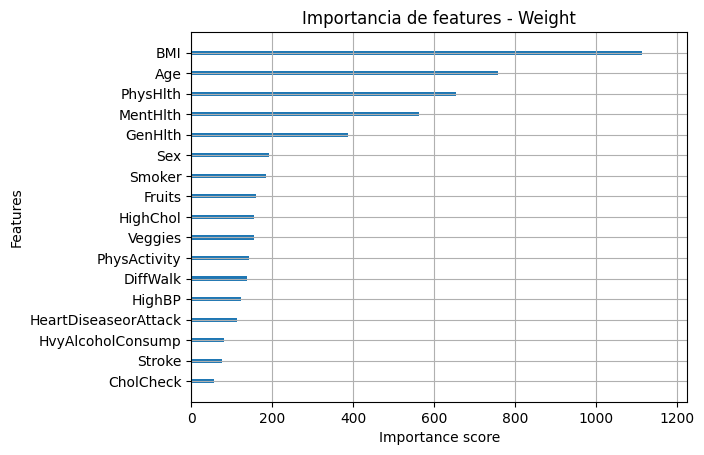

<Figure size 1000x800 with 0 Axes>

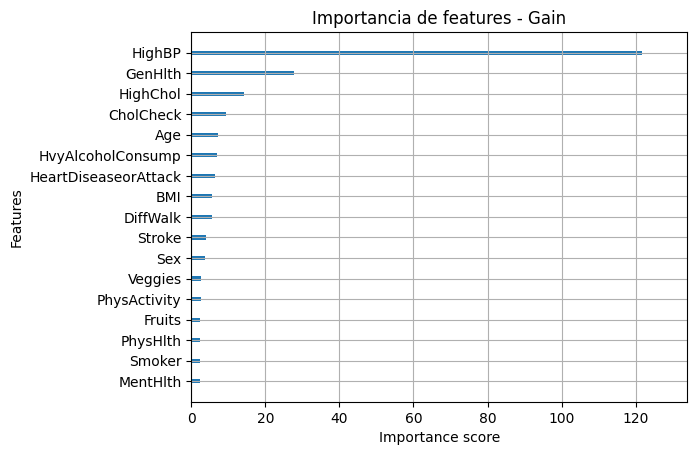

<Figure size 1000x800 with 0 Axes>

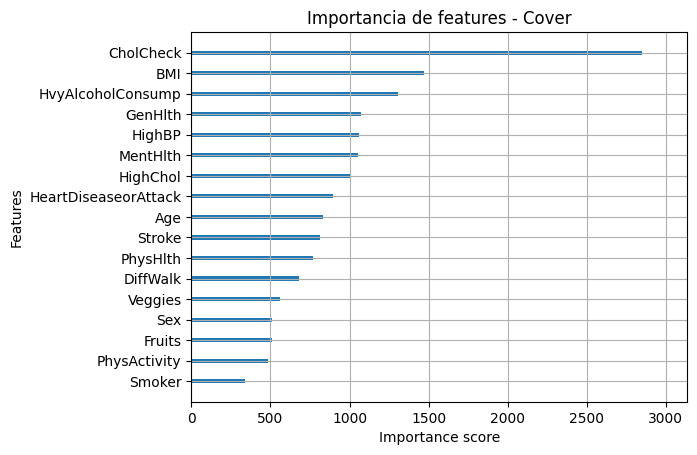

In [11]:
# Inserte su código aquí
import matplotlib.pyplot as plt
from xgboost import plot_importance

xgb_model = pipeline.named_steps["model"]

plt.figure(figsize=(10, 8))
plot_importance(xgb_model, importance_type='weight', show_values=False)
plt.title("Importancia de features - Weight")
plt.show()

plt.figure(figsize=(10, 8))
plot_importance(xgb_model, importance_type='gain', show_values=False)
plt.title("Importancia de features - Gain")
plt.show()

plt.figure(figsize=(10, 8))
plot_importance(xgb_model, importance_type='cover', show_values=False)
plt.title("Importancia de features - Cover")
plt.show()

### 3.2
En general, no son plenamente compatibles, coinciden en algunas variables del top pero el orden y la magnitud cambian entre métodos. Esto se ve en los gráficos: weight y cover tienden a empujar hacia arriba a variables con alto uso repetido ( variables continuas como Age y BMI o splits altos del árbol), mientras que gain prioriza las que más reducen la pérdida (a menudo variables clínicas más informativas como CholCheck/GenHlth). Estas diferencias se dan ya que weight se basa en la frecuencia de uso de la feature en los splits (frecuencia), gain en la reducción media de la pérdida (utilidad), y cover mide la cantidad promdeio de muestras impactadas por las divisiones de esa variable (alcance). Esto conlleva diferentes sesgos del criterio:
* weight favorece features con muchos umbrales posibles (continuas) aunque su aporte sea pequeño.
* cover favorece splits altos del árbol (afectan a muchos registros) aunque no mejoren mucho la pérdida.
* gain favorece splits con gran mejora local, pero puede repartirse entre features correlacionadas.

### 3.3 
Las importancias obtenidas no son suficientes para obtener la interpretabilidad de un modelo que utiliza árboles. Las importancias internas (weight/gain/cover) dan un ranking global, pero no entregan interpretabilidad suficiente. Estos métodos tiene como debilidad que no muestran dirección del efecto (positivo/negativo) ni explican predicciones individuales. Asimismo, como se nombre en la pregunta anterior, presentán sesgos por cardinalidad y correlación: la importancia se reparte entre features correlacionadas y favorece variables con muchos umbrales.

## 4. Métodos Agnósticos Globales (10 puntos)

<p align="center">
  <img src="https://media.tenor.com/JcRHtjVuXN8AAAAC/dr-simi-farmacias-similares.gif" width="400">
</p>

Tareas:
1. Para mitigar los problemas encontrados en la sección anterior, Dr. Simi le pide implementar un **método de permutación** que le permita observar la importancia de las features. `Nota:`Tenga cuidado con el orden de las columnas de este método. `Hint:` Puede obtener los features del clasificador con su respectivo orden mediante el método `.get_booster().feature_names` (2 puntos)
2. Para que su modelo sea consistente, repita el proceso **30 veces** y verifique la desviación estándar de sus resultados (¿Qué señala esta?). (2 puntos)
3. Visualice los resultados de este método en un gráfico. (2 puntos)
4. Además, responda las siguientes preguntas:
  - ¿Cómo mide la importancia de las features su propuesta? (1 punto)
  - ¿Qué features tienen un mayor impacto en la salida del modelo?. Comente las 5 primeras, ¿tienen sentido? (1 punto)
  - ¿Cómo cambian sus conclusiones con respecto a las features importances del punto anterior? (1 punto)
  - Nombre y explique 3 ventajas y 3 desventajas del método implementado. (1 punto)

In [12]:
import numpy as np
import pandas as pd
from sklearn.inspection import permutation_importance
import plotly.express as px

booster = xgb_model.get_booster()
ordered_feature_names = booster.feature_names

In [13]:
# Inserte su código aquí

n_repeats = 30

result = permutation_importance(
    pipeline,
    X_test,
    y_test,
    n_repeats=30,
    random_state=1892,
    n_jobs=-1
)


mean_importance = result.importances_mean
std_importance = result.importances_std

importance_df = pd.DataFrame({
    "Feature": ordered_feature_names,
    "MeanImportance": mean_importance,
    "StdImportance": std_importance
}).sort_values("MeanImportance", ascending=False)


In [14]:
# Desviación estándar del proceso de permutación
fig = px.bar(
    importance_df,
    x="Feature",
    y="StdImportance",
    title="Desviación estándar del proceso de permutación",
    labels={"StdImportance": "Desviación estándar", "Feature": "Características"}
)
fig.show()

In [15]:
fig = px.bar(
    importance_df,
    x="MeanImportance",
    y="Feature",
    error_x="StdImportance",
    orientation="h",
    title="Permutation Feature Importance (30 repeticiones)",
    height=700
)
fig.update_layout(yaxis=dict(autorange="reversed"))
fig.show()

### 4.2 
Después de las repeticiones de las permutaciones, para cada característica se obtiene una distribución de valores de importancia, importances_std guarda la desviación estándar de esa distribución, es decir, qué tan variable o inestable es la importancia estimada. Si esta es baja, entonces la importancia de la variable es estable y confiable, pero si es alta quiere decir que la importancia varía mucho entre repeticiones, el modelo podría ser sensible al azar o la variable tener un efecto débil/inestable. De nuestros resultados se puede observar que para features con importancias altas la desviación estándar es pequeña dando validez a los resultados. En cambio para las variables con importancias bajas la desviación estándar es alta dando a entender que no son muy valiosas para el modelo según el método de permutación.

### 4.4 TODO

4. Además, responda las siguientes preguntas:
  - ¿Cómo mide la importancia de las features su propuesta? (1 punto)
  - ¿Qué features tienen un mayor impacto en la salida del modelo?. Comente las 5 primeras, ¿tienen sentido? (1 punto)
  - ¿Cómo cambian sus conclusiones con respecto a las features importances del punto anterior? (1 punto)
  - Nombre y explique 3 ventajas y 3 desventajas del método implementado. (1 punto)

* El método 'permutation_importance' mide la importancia de cada variable observando cuánto empeora el rendimiento del modelo (por ejemplo F1, AUC, etc.) cuando los valores de esa variable se desordenan aleatoriamente, es decir, si al permutar una variable el rendimiento baja mucho, entonces la variable es muy importante.
* Las features con más impacto son:
    1. Fruits: Variable binaria sobre el consumo de frutas. Tiene sentido que sea una variable importante ya que un consumo de frutas puede significar mejores habitos alimenticios, pero llama la atención que sea la más importante por sobre otras como salud general o actividad física.
    2. GenHlth: Variable ordinal del 1 al 5 sobre la salud general del paciente. Tiene sentido que sea muy predictiva, pues resume el estado de salud global.
    3. Age: La edad es un factor biológico clave en la detección de diabetes (sobretodo de tipo 2) y su inclusión como variable importante es coherente.
    4. HighBP: Feature binaria sobre presión arterial alta. La hipertensión esta asocidada en algunos casos a la diabetes por lo que tioeen sentido su importancia.
    5. MentHlth: Valor ordinal del 1 al 30 relacionado con la salud mental. El bienestar mental también impacta en la salud general y está correlacionado con varios indicadores médicos por lo que también tiene sentido su importancia.
* Si comparamos los resultados con el método de importancia dado por la ganancia (más fidedigno a nuestro parecer) estos son muy similares en el top 5. Comparten las variables GenHlth, Age, HighBP y MentHlth, pero en diferente orden. La diferencia más notable es que en el método por permutación la feature más importante es Fruits y en el de ganancia esta bien abajo en el top. Si comparamos la permutación con las estrategias de weight y cover también se observan features que estan en ambos top's, donde la que más se repiten es GenHlth. Destacar que aunque no cambiaron muchos las variables más importantes, si cambia la forma de interpretar la importancia, las conclusiones ahora son más interpretables y robustas, ya que el método evalúa el impacto real en el rendimiento del modelo, no solo su contribución interna al ajuste.
* Ventajas y desventajas de la importancia por permutación:
    * Ventajas:
        - Interpretabilidad directa: muestra cómo cambia la métrica del modelo al perturbar una variable, lo que facilita entender su impacto real.
        - Modelo-agnóstico: funciona con cualquier tipo de modelo (árboles, redes neuronales, regresiones, etc.).
        - Evalúa en datos de prueba: mide la importancia en términos de generalización, no solo de ajuste interno.
    * Desventajas:
        - Alto costo computacional: requiere re-evaluar el modelo muchas veces (una por variable × repeticiones).
        - Sensibilidad a variables correlacionadas: si dos variables están correlacionadas, al permutar una, la otra puede compensar, subestimando su importancia.
        - Depende de la métrica de evaluación: distintas métricas (accuracy, F1, etc.) pueden alterar el orden relativo de importancia.

## 5. Métodos Agnósticos Locales (20 puntos)

<p align="center">
  <img src="https://i.makeagif.com/media/10-24-2024/oMCrLI.gif" width="400">
</p>

### 5.1 Calculando Shap Values (4 puntos)

Tareas:
1. Alegre por saber cómo funciona el modelo de predicción a nivel general, Dr. Simi le pide ahora interpretar las predicciones de su modelo a nivel de paciente (es decir, desde un punto de vista **local**). Para esto, el ilustre farmacéutico le pide calcular los *shap values* de su modelo. (2 puntos)
2. ¿Qué representa cada número en su resultado? (1 punto)
3. ¿Es posible atribuir un significado a la positividad/negatividad de cada valor? (1 punto)

In [16]:
!pip install shap


[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: C:\Users\shabe\AppData\Local\Programs\Python\Python312\python.exe -m pip install --upgrade pip


In [17]:
import warnings
warnings.filterwarnings("ignore", message=".*The 'nopython' keyword.*")

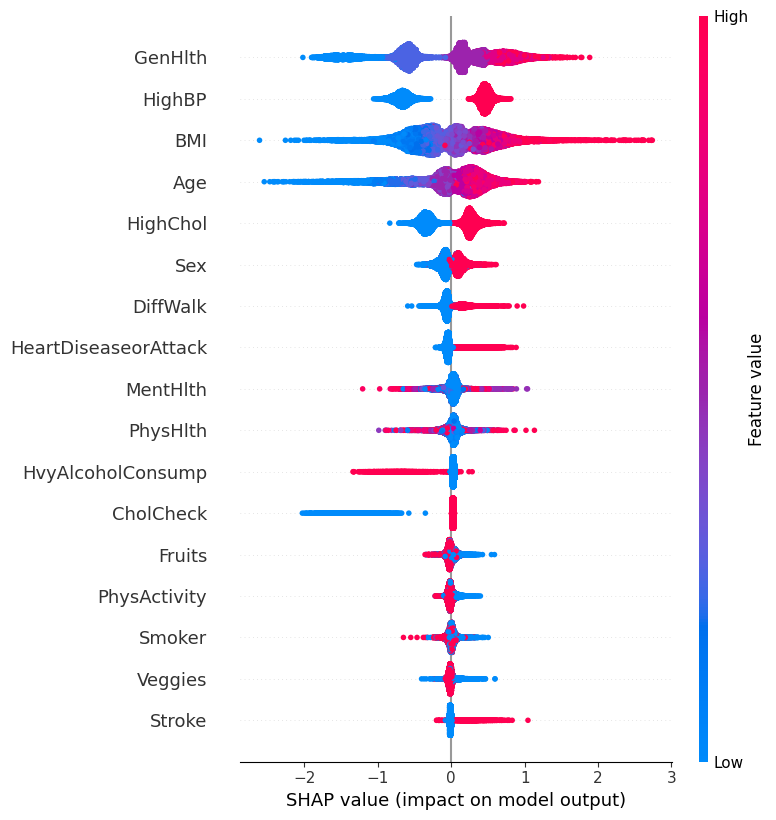

In [18]:
# Inserte código para calcular shapley values aquí
import shap
import numpy as np

X_test_transformed = pipeline.named_steps["preprocessor"].transform(X_test)
xgb_model = pipeline.named_steps["model"]
feature_names = pipeline.named_steps["preprocessor"].get_feature_names_out()

explainer = shap.TreeExplainer(xgb_model)

shap_values = explainer(X_test_transformed)

shap.summary_plot(shap_values, X_test_transformed, feature_names=feature_names)


#### 5.1.2 

Cada valor SHAP mide cuánto aporta cada característica a la predicción final del modelo para una observación específica. Más especificamente, cada número en shap_values representa la contribución (positiva o negativa) de una característica al resultado del modelo para un individuo específico según el valor base donde el valor base es el valor esperado de la salida de un modelo de aprendizaje automático si no tuviera información sobre las características, luego el SHAP mide cuánto cambia esa predicción debido a la característica i. En el gráfico:
* Eje X: valor del SHAP (impacto en la predicción).
* Eje Y: características ordenadas por importancia promedio (|SHAP|).
* Color: valor real de la variable (rojo = alto, azul = bajo).
* Cada punto: un paciente (observación).
#### 5.1.3 

Si es posible atribuir un significado a la positividad/negativiudad de cada valor. Como se nombro en la pregunta anterior cada valor SHAP, en el contexto de un modelo binario XGBoost, representa la contribución individual de una característica a la predicción del modelo para un paciente específico, en relación con un valor base (la probabilidad media de diabetes en el conjunto de datos). Los valores SHAP positivos indican que una característica aumenta la probabilidad predicha de tener diabetes, mientras que los negativos indican que la disminuye. Por ejemplo, un valor SHAP positivo para HighBP (presión alta) sugiere que esta condición empuja la predicción hacia un mayor riesgo de diabetes, mientras que un valor negativo para Fruits implica que el consumo de frutas reduce dicha probabilidad. En síntesis, los SHAP values permiten descomponer la predicción individual del modelo en aportes comprensibles de cada característica respecto al valor base, explicando de manera transparente cómo se llega a la decisión final.

Por último, destacar que con la variable HvyAlcoholConsump donde si bien lo valores bajos no tienen impacto en el SHAP los niveles altos tienen un impacto negativo en la probabilidad de detectar diabetes. El comportamiento de esta última variable se puede deber a que menos 0.043% de los pacientes presenta consumos altos de alcohol por lo que el modelo no dispone de suficientes ejemplos representativos para aprender una relación clara entre el consumo elevado de alcohol y la presencia de diabetes.

### 5.2 Aporte local (4 puntos)

1. Usando los *shap values* calculados, grafique el **aporte local** de las diferentes variables para las instancias **1**, **9** y **150** (1 punto).

2. Interprete sus resultados y responda:

  - ¿Qué variables afectan de manera positiva/negativa a la probabilidad de poseer diabetes? (1 punto)

  - ¿Existe algún patrón común entre las instancias analizadas? (1 punto)

  - ¿Es posible generalizar estas conclusiones a todo el dataset? (1 punto)

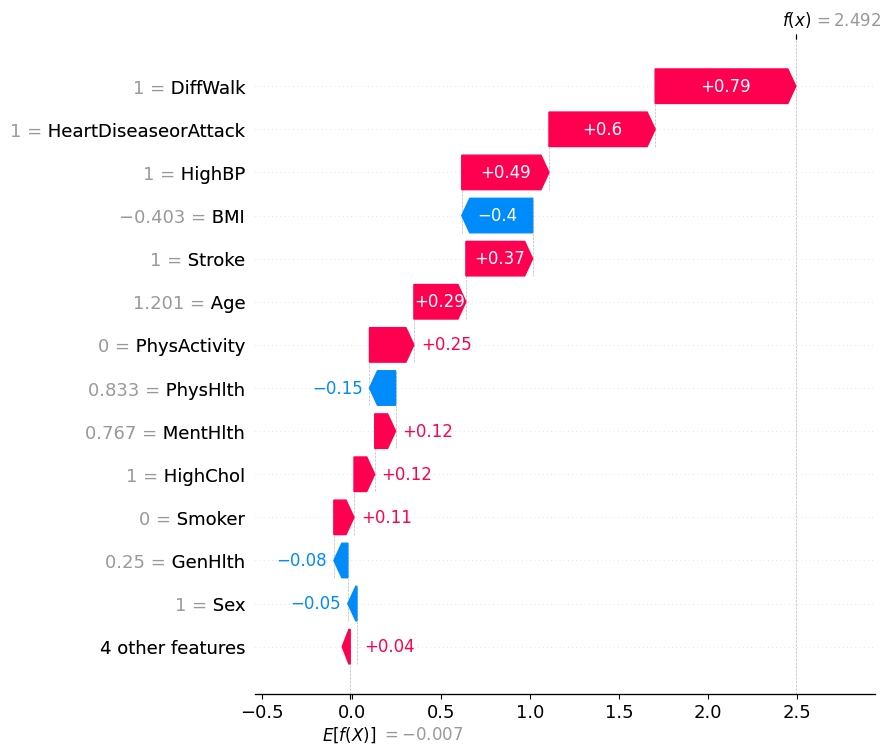

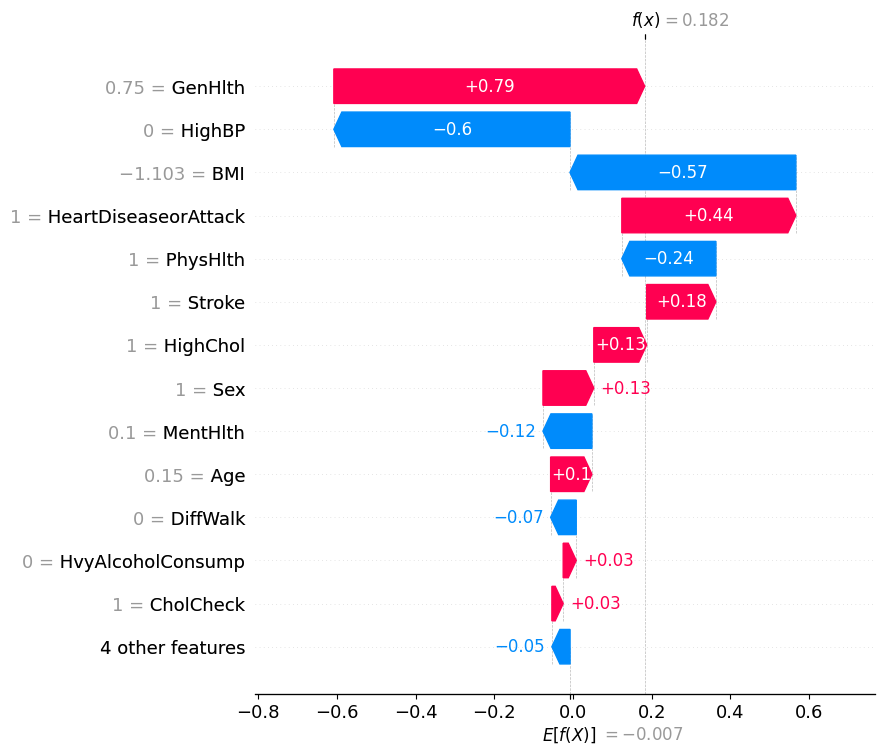

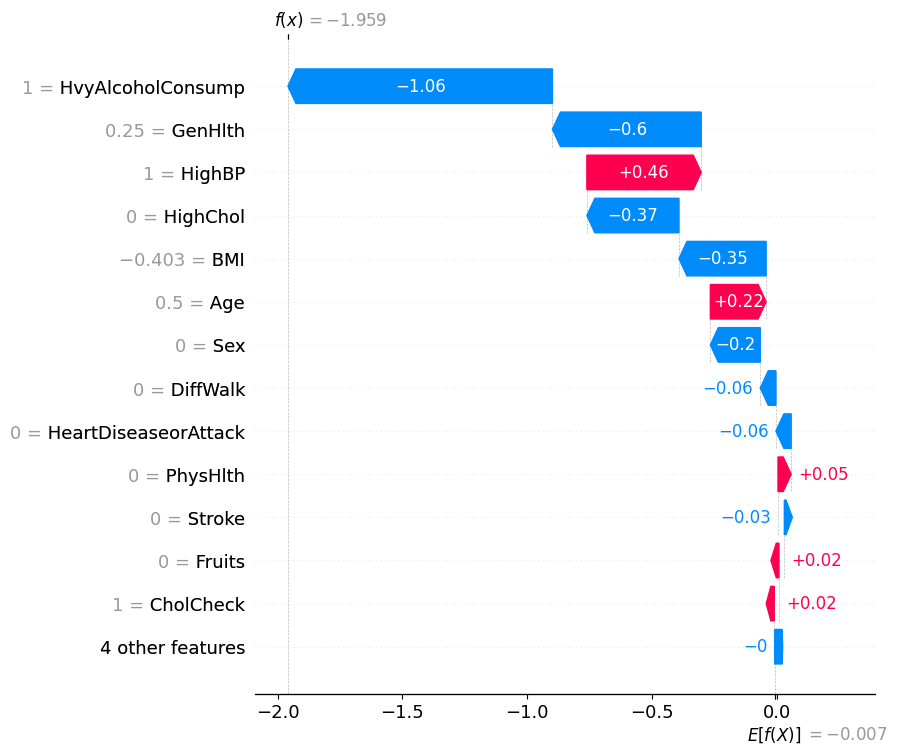

In [19]:
for idx in [1, 9, 150]:
    shap.plots.waterfall(shap_values[idx,:], 
                     max_display=14)

#### 5.2.2 

* En las gráficas se observa que variables como HighBP (presión alta), HeartDiseaseorAttack (enfermedad cardíaca o ataque al corazón), DiffWalk (dificultad para caminar), Stroke (derrame cerebral) y Age (edad) tienen valores SHAP positivos cuando estas variables son altas, lo que significa que aumentan la probabilidad de que el modelo prediga diabetes. Por el contrario, variables como HvyAlcoholConsump (consumo excesivo de alcohol), BMI (índice de masa corporal) y PhysHlth (salud física) presentan valores SHAP negativos, lo que implica que disminuyen la probabilidad predicha de diabetes para esas instancias en particular. Destacando que features que afectan de manera positiva cuando tienen un valor alto pueden afectar de manera negativa si son bajas, y viceversa.
* Un patrón consistente entre las instancias es que las condiciones asociadas a enfermedades cardiovasculares y limitaciones físicas tienden a aumentar la probabilidad predicha de diabetes, mientras que factores de estilo de vida saludables tienden a reducirla. Además, en los tres casos el modelo otorga un peso importante a HighBP y HeartDiseaseorAttack, lo que sugiere que el modelo identifica correctamente la relación médica conocida entre estas variables y el riesgo de diabetes.
* Si bien las explicaciones SHAP locales son útiles para entender casos individuales, no se deben generalizar directamente a todo el conjunto de datos. Cada gráfico representa la descomposición de la predicción de un paciente específico, y las contribuciones pueden variar significativamente entre individuos. Sin embargo, si se observan tendencias consistentes se pueden corroborar mediante un análisis SHAP globales.

### 5.3 Aporte global (4 puntos)

Genere ahora una visualización donde se grafique el aporte de cada feature a nivel **global** e interprete sus resultados. ¿Qué diferencias existen con las conclusiones generadas a nivel de instancia?

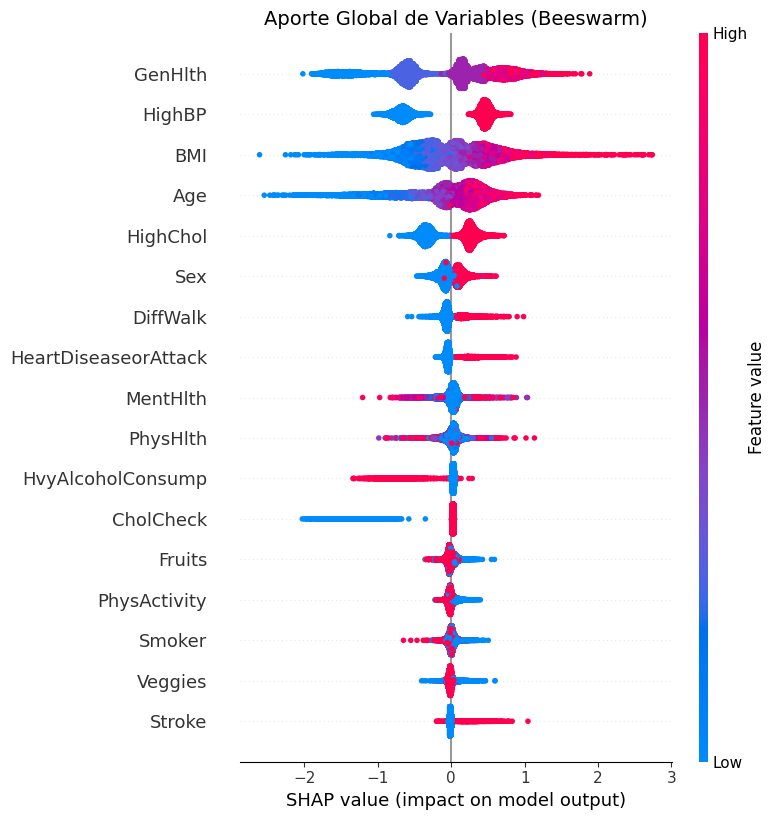

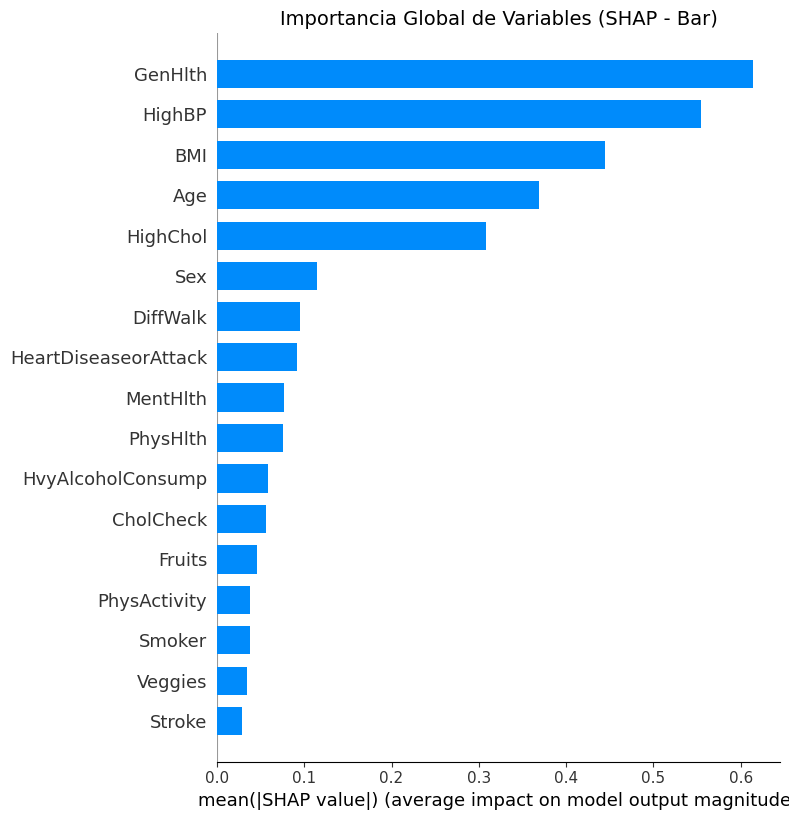

In [20]:
# Inserte código para generar gráficos de aporte global aquí

plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_test_transformed, plot_type="dot", show=False)
plt.title("Aporte Global de Variables (Beeswarm)", fontsize=14)
plt.tight_layout()
plt.show()

# 2️⃣ Gráfico resumen tipo bar (muestra magnitud media absoluta de cada variable)
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_test_transformed, plot_type="bar", show=False)
plt.title("Importancia Global de Variables (SHAP - Bar)", fontsize=14)
plt.tight_layout()
plt.show()

### 5.3

Las conclusiones obtenidas a nivel global con los valores SHAP complementan y amplían las observaciones hechas a nivel de instancia. Mientras que las explicaciones locales muestran cómo influyen las características en la predicción de un paciente específico, el análisis global permite identificar tendencias generales del modelo. Por ejemplo, en el gráfico beeswarm se observa que variables como HighBP, Age y HeartDiseaseorAttack tienden a aumentar la probabilidad de diabetes cuando sus valores son altos, lo que confirma los patrones observados en los pacientes individuales. Sin embargo, al analizar todo el conjunto de datos se observa con mayor claridad la magnitud y estabilidad de estas relaciones, así como las interacciones entre distintas variables. Un comportamiento extraño que se observa es el de GentHlth donde valores altos de salud general estan asociados a mayor riesgo de padecer diabetes, lo que nos puede decir que la escala con la cual se mide la salud general puede ser invertida, es decir, 1 para una buena salud y 5 para una mala salud.

En contraste, a nivel individual algunas características pueden tener un efecto distinto dependiendo del contexto del paciente, por ejemplo las features de DiffWalk o HvyAlcoholConsump tienen una gran influencia en los análisis locales, pero en los globales es mucho menor. Asimismo, para esta última variable al observar, en el enfoque local, que un valor alto de consumo de alcohol disminuye la probabilidad de tener diabetes se podría haber concluído que era un error para solo el paciente analizado, pero con el enfoque global se observa que es un patrón general.

### 5.4 Scatter plot (4 puntos)


Grafique ahora un *scatterplot* entre los *shap values* y las primeras 5 features con mayor impacto global (un gráfico por cada feature), coloreando cada punto por la probabilidad de tener diabetes. ¿Qué puede concluir de sus resultados?

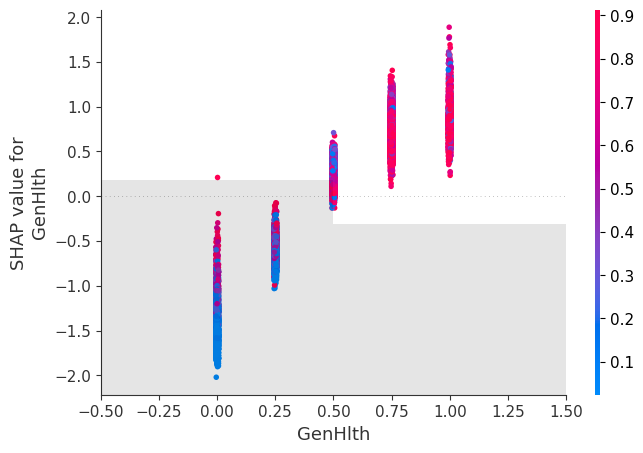

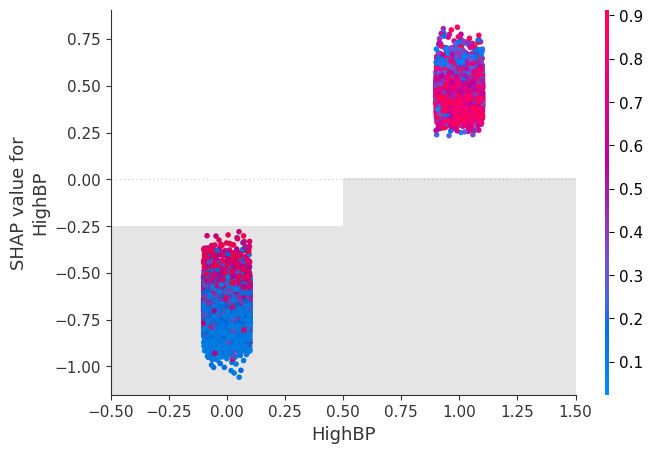

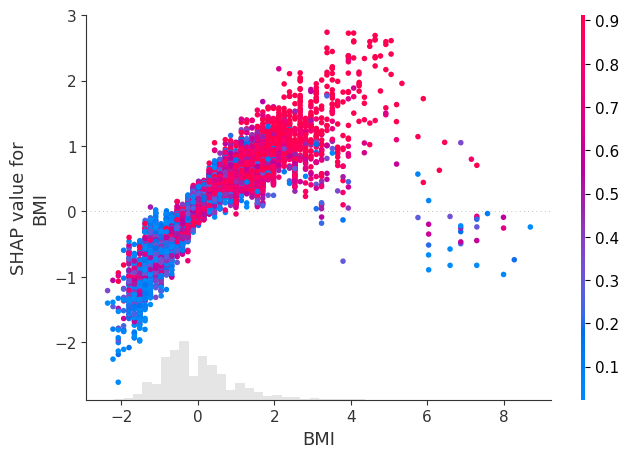

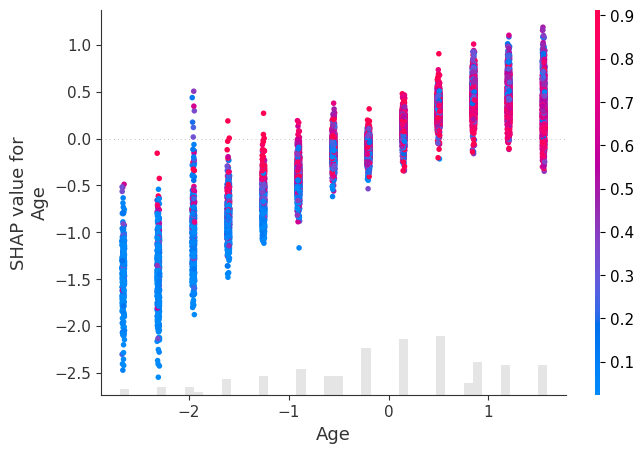

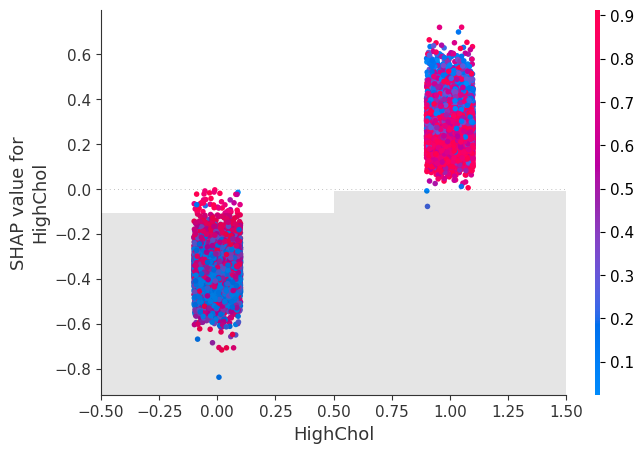

In [43]:
# Calcula la importancia media absoluta
shap_values_abs = np.abs(shap_values.values).mean(axis=0)

# Calcular las probabilidades para colorear el scatter plot
probs = xgb_model.predict_proba(X_test_transformed)[:, 1]

# Orden de mayor a menor
order = np.argsort(shap_values_abs)[::-1]
top_features = [shap_values.feature_names[i] for i in order[:5]]

for f in top_features:
    shap.plots.scatter(shap_values[:, f],
                       color=probs) 

### 5.4

En los cinco gráficos generados se observa que, a medida que aumentan los valores de las variables, también lo hacen los valores de SHAP y la probabilidad de presentar diabetes. Este comportamiento, en el que los valores altos de las variables se asocian con una mayor probabilidad de diabetes, se debe principalmente a la naturaleza de las cinco variables más relevantes (top 5 features). Si, por ejemplo, en el conjunto de variables más importantes se incluyera PhysActivity, se esperaría el patrón opuesto: a mayores valores de la variable, menores serían los valores de SHAP y, por tanto, la probabilidad de tener diabetes.

Asimismo, se observa que en las cinco variables existen valores atípicos; es decir, casos de personas con colesterol alto pero sin diabetes, o viceversa. Sin embargo, en términos generales, los resultados siguen las tendencias esperadas.

En conclusión, los resultados indican que las personas con un índice de salud general bajo, presión arterial alta, índice de masa corporal elevado, edad avanzada o colesterol alto presentan mayores probabilidades de padecer diabetes. Además, estas características se destacan como las más relevantes para predecir si un paciente tiene o no diabetes.

### 5.5 Partial Dependence Plot (4 puntos)

Finalmente, se le pide generar un gráfico del tipo Partial Dependence Plot para las mismas 5 variables con mayor impacto global usando una submuestra de 1000 observaciones. ¿Qué relación existe entre la salida promedio del modelo y cada feature analizada? ¿Son estas conclusiones generalizables para todo el conjunto de datos?

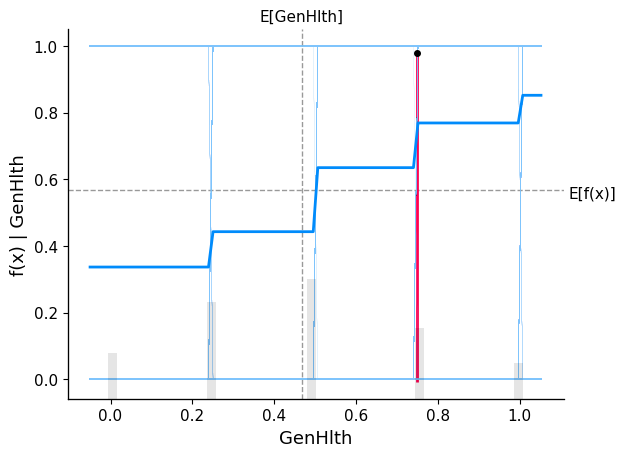

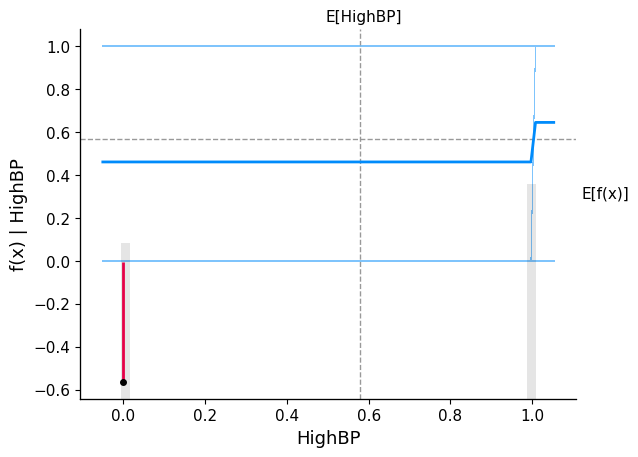

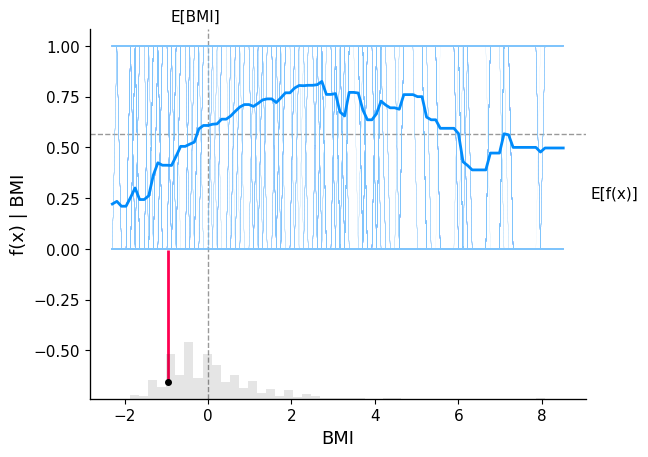

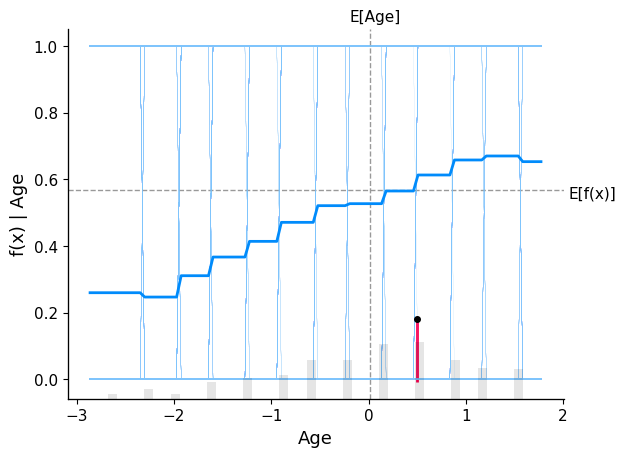

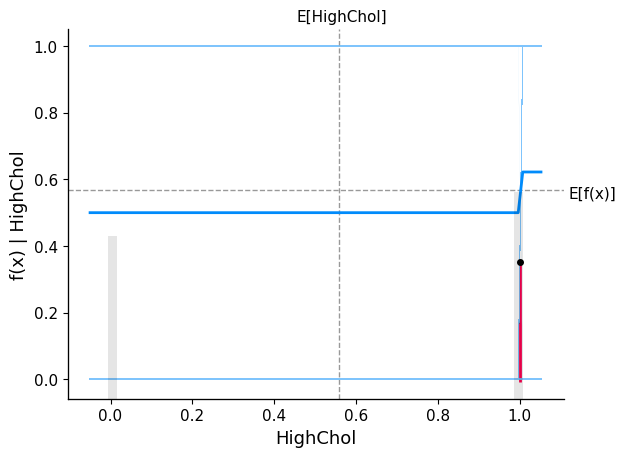

In [22]:
# Inserte código para generar gráficos PDP aquí

import shap
import matplotlib.pyplot as plt

# Submuestreo de 1000 puntos para que los PDP sean más rápidos y legibles
X1000 = shap.utils.sample(X_test_transformed, 1000, random_state=1892)

# Elegimos un paciente/instancia específica (por ejemplo la #20)
sample_ind = 20

for feature in top_features:
    shap.partial_dependence_plot(
        ind=feature,
        model=xgb_model.predict,
        data=X1000,
        model_expected_value=True,
        feature_expected_value=True,
        ice=True,
        shap_values=shap_values[sample_ind:sample_ind+1, :]  # curva destacada
    )

### 5.5 TODO

## 6. Sistema de Reglas! (10 punto)

<p align="center">
  <img src="https://media.baamboozle.com/uploads/images/125978/1638281150_1380186_gif-url.gif" width="400">
</p>

Después de todo el trabajo hecho, Dr. Simi le pide simplificar el funcionamiento de su modelo en un sistema de reglas que le permita explicar a sus clientes las predicciones que genera su modelo.
En particular, Dr. Simi le pide explicar la decisión tomada para las observaciones **1000**, **3001** y **5751**. Con las reglas propuestas señale a **cuánta población** es posible explicar con estas reglas e indique la **precisión** que poseen las reglas en la totalidad de los datos. ¿Tienen sentido sus reglas propuestas para las observaciones?. Fundamente sus respuesta señalando el impacto que tienen sus reglas sobre todo el conjunto de datos.

`Hint:` Como debe entregar las columnas que entran al clasificador entrenado de su pipeline, le será útil extraer el paso de preprocesamiento y generar dataframes preprocesados para el conjunto `train` y `test`.

In [23]:
!pip install alibi


[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: C:\Users\shabe\AppData\Local\Programs\Python\Python312\python.exe -m pip install --upgrade pip


In [34]:
from alibi.explainers import AnchorTabular

# Extraer pasos del pipeline
preprocessor = pipeline.named_steps['preprocessor']
classifier = pipeline.named_steps['model']

# Transformar datos
X_train_proc = preprocessor.transform(X_train)
X_test_proc = preprocessor.transform(X_test)

# generar predicciones
preds = classifier.predict(X_test_proc)
print(classification_report(preds, y_test))

predict_fn = lambda x: classifier.predict(x) # creamos función de predicción
explainer = AnchorTabular(predict_fn, classifier.feature_names_in_, seed=1894) # instanciamos Anchor usando función creada
explainer.fit(X_train_proc.to_numpy()) # sobre los datos



              precision    recall  f1-score   support

           0       0.70      0.77      0.73      9549
           1       0.80      0.72      0.76     11659

    accuracy                           0.75     21208
   macro avg       0.75      0.75      0.75     21208
weighted avg       0.75      0.75      0.75     21208



AnchorTabular(meta={
  'name': 'AnchorTabular',
  'type': ['blackbox'],
  'explanations': ['local'],
  'params': {'seed': 1894, 'disc_perc': (25, 50, 75)}}
)

In [41]:
idx = 1000
# explicar predicción idx 1000
print("Explicación para la observación índice:", idx)
obs = np.array(X_test_proc.iloc[idx], ndmin = 2) # array de la obs

# generar anchor
explanation = explainer.explain(obs, # obs a explicar
                                threshold=0.95, # min precision de anchor
                                )

print('Prediction: ', explainer.predictor(X_test_proc.to_numpy()[idx].reshape(1, -1))[0]) # obtener prediccion del modelo 
print('Anchor: %s' % (' AND '.join(explanation.anchor))) # obtener regla 
print('Precision: %.2f' % explanation.precision) # obtener precision
print('Coverage: %.2f' % explanation.coverage) # obtener cobertura


idx = 3001
# explicar predicción idx 3001
print("\nExplicación para la observación índice:", idx)
obs = np.array(X_test_proc.iloc[idx], ndmin = 2) # array de la obs

# generar anchor
explanation = explainer.explain(obs, # obs a explicar
                                threshold=0.95, # min precision de anchor
                                )

print('Prediction: ', explainer.predictor(X_test_proc.to_numpy()[idx].reshape(1, -1))[0]) # obtener prediccion del modelo 
print('Anchor: %s' % (' AND '.join(explanation.anchor))) # obtener regla 
print('Precision: %.2f' % explanation.precision) # obtener precision
print('Coverage: %.2f' % explanation.coverage) # obtener cobertura


idx = 5751
# explicar predicción idx 5751
print("\nExplicación para la observación índice:", idx)
obs = np.array(X_test_proc.iloc[idx], ndmin = 2) # array de la obs

# generar anchor
explanation = explainer.explain(obs, # obs a explicar
                                threshold=0.95, # min precision de anchor
                                )

print('Prediction: ', explainer.predictor(X_test_proc.to_numpy()[idx].reshape(1, -1))[0]) # obtener prediccion del modelo 
print('Anchor: %s' % (' AND '.join(explanation.anchor))) # obtener regla 
print('Precision: %.2f' % explanation.precision) # obtener precision
print('Coverage: %.2f' % explanation.coverage) # obtener cobertura

Explicación para la observación índice: 1000
Prediction:  1
Anchor: GenHlth > 0.50 AND HighChol > 0.00 AND PhysActivity <= 0.00
Precision: 0.98
Coverage: 0.27

Explicación para la observación índice: 3001
Prediction:  1
Anchor: BMI > -0.12 AND HighBP > 0.00 AND HighChol > 0.00
Precision: 0.96
Coverage: 0.45

Explicación para la observación índice: 5751
Prediction:  1
Anchor: GenHlth > 0.25 AND HighBP > 0.00 AND BMI > -0.12 AND Age > -0.55
Precision: 0.99
Coverage: 0.68


### 6
¿Tienen sentido sus reglas propuestas para las observaciones?. Fundamente sus respuesta señalando el impacto que tienen sus reglas sobre todo el conjunto de datos.

# Retrospectiva... (10 puntos)

En base a los diferentes métodos que implementa y ha comentado en este laboratorio, comente qué métodos le permiten entregar mejores conclusiones para la tarea de clasificación de diabetes. Por otro lado, ¿qué métodos son más útiles para el problema del doctor Simi, métodos agnosticos locales o globales?

> Fundamente su Respuesta aquí

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=87110296-876e-426f-b91d-aaf681223468' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>